# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import requests
import tweepy
import json
from datetime import datetime

In [2]:
#Data from twitter archive in the form of a csv file.
t_archive = pd.read_csv('twitter-archive-enhanced.csv')
t_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
import os
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [6]:

with open(url.split('/')[-1].replace('-','_'), mode = 'wb') as f:
    f.write(response.content)
f.close()

In [8]:
image_data = pd.read_csv('image_predictions.tsv', sep = '\t')
image_data.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [9]:
# import tweepy
# from tweepy import OAuthHandler
# import json
# from timeit import default_timer as timer

# # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# # These are hidden to comply with Twitter's API terms and conditions
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# # NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# # df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# # change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# # NOTE TO REVIEWER: this student had mobile verification issues so the following
# # Twitter API code was sent to this student from a Udacity instructor
# # Tweet IDs for which to gather additional data via Twitter's API
# tweet_ids = df.tweet_id.values
# len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)

In [10]:
import json
file_path= 'tweet_json.txt'

tweets =[]
with open(file_path) as f:
    for line in f:
        tweets.append(json.loads(line))




In [11]:
j_df = pd.DataFrame(tweets)
j_df.head(1)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,None,...,False,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### t_archive

In [12]:
t_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
t_archive.shape

(2356, 17)

In [14]:
sum(t_archive.duplicated())

0

In [15]:
t_archive['tweet_id'].nunique()

2356

In [16]:
t_archive['in_reply_to_status_id'].value_counts().shape

(77,)

In [17]:
t_archive[t_archive['in_reply_to_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610...,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None


In [18]:
t_archive.loc[t_archive['in_reply_to_status_id'].notnull(),'expanded_urls']

30                                                    NaN
55                                                    NaN
64                                                    NaN
113                                                   NaN
148                                                   NaN
149     https://twitter.com/dog_rates/status/863079547...
179                                                   NaN
184     https://twitter.com/dog_rates/status/856526610...
186                                                   NaN
188                                                   NaN
189                                                   NaN
218                                                   NaN
228                                                   NaN
234                                                   NaN
251     https://twitter.com/dog_rates/status/844979544...
274                                                   NaN
290                                                   NaN
291           

In [19]:
t_archive['in_reply_to_user_id'].value_counts().shape

(31,)

In [20]:
t_archive[t_archive['in_reply_to_user_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610...,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None


In [21]:
t_archive['timestamp'][:4]

0    2017-08-01 16:23:56 +0000
1    2017-08-01 00:17:27 +0000
2    2017-07-31 00:18:03 +0000
3    2017-07-30 15:58:51 +0000
Name: timestamp, dtype: object

In [22]:
t_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [23]:
t_archive['expanded_urls'][t_archive['expanded_urls'].duplicated()]

55                                                    NaN
64                                                    NaN
75      https://www.gofundme.com/3yd6y1c,https://twitt...
76      https://twitter.com/dog_rates/status/878057613...
98      https://www.gofundme.com/help-my-baby-sierra-g...
113                                                   NaN
126     https://www.gofundme.com/3ti3nps,https://twitt...
135     https://twitter.com/dog_rates/status/866450705...
136     https://twitter.com/dog_rates/status/866334964...
148                                                   NaN
150     https://www.gofundme.com/helpquinny,https://tw...
161     https://www.gofundme.com/help-lorenzo-beat-can...
169     https://twitter.com/dog_rates/status/859196978...
179                                                   NaN
185                                                   NaN
186                                                   NaN
188                                                   NaN
189           

In [24]:
len(t_archive['expanded_urls'][t_archive['expanded_urls'].duplicated()])

137

In [25]:
t_archive['text'][t_archive['expanded_urls'].isna()]

30      @NonWhiteHat @MayhewMayhem omg hello tanner yo...
55      @roushfenway These are good dogs but 17/10 is ...
64                        @RealKentMurphy 14/10 confirmed
113     @ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...
148     @Jack_Septic_Eye I'd need a few more pics to p...
179                          @Marc_IRL pixelated af 12/10
185     RT @Jenna_Marbles: @dog_rates Thanks for ratin...
186     @xianmcguire @Jenna_Marbles Kardashians wouldn...
188     @dhmontgomery We also gave snoop dogg a 420/10...
189     @s8n You tried very hard to portray this good ...
218     @markhoppus MARK THAT DOG HAS SEEN AND EXPERIE...
228     Jerry just apuppologized to me. He said there ...
234     .@breaannanicolee PUPDATE: Cannon has a heart ...
274     @0_kelvin_0 &gt;10/10 is reserved for puppos s...
290                                    @markhoppus 182/10
291     @bragg6of8 @Andy_Pace_ we are still looking fo...
313     @jonnysun @Lin_Manuel ok jomny I know you're e...
342           

In [26]:
t_archive['expanded_urls'][t_archive['expanded_urls'].duplicated()]

55                                                    NaN
64                                                    NaN
75      https://www.gofundme.com/3yd6y1c,https://twitt...
76      https://twitter.com/dog_rates/status/878057613...
98      https://www.gofundme.com/help-my-baby-sierra-g...
113                                                   NaN
126     https://www.gofundme.com/3ti3nps,https://twitt...
135     https://twitter.com/dog_rates/status/866450705...
136     https://twitter.com/dog_rates/status/866334964...
148                                                   NaN
150     https://www.gofundme.com/helpquinny,https://tw...
161     https://www.gofundme.com/help-lorenzo-beat-can...
169     https://twitter.com/dog_rates/status/859196978...
179                                                   NaN
185                                                   NaN
186                                                   NaN
188                                                   NaN
189           

In [27]:
# some duplicates in the 'expanded_urls' refer to original tweets, we will have to use 'text' column to seperate tweets from their replies.
t_archive.loc[t_archive['expanded_urls'].duplicated(keep='first'), 'text'].sample(10)

732     Idk why this keeps happening. We only rate dog...
707        Today, 10/10, should be National Dog Rates Day
98      This is Sierra. She's one precious pupper. Abs...
439     This is Oliver. He has dreams of being a servi...
864     This is Buddy. His father was a bear and his m...
409                                  @HistoryInPics 13/10
1905    The 13/10 also takes into account this impecca...
276     Say hello to Maddie and Gunner. They are consi...
1895    Some clarification is required. The dog is sin...
1970    Meet Eve. She's a raging alcoholic 8/10 (would...
Name: text, dtype: object

In [28]:
t_archive['text'][t_archive['text'].str.match('.*\@.+')]

19      RT @dog_rates: This is Canela. She attempted s...
30      @NonWhiteHat @MayhewMayhem omg hello tanner yo...
32      RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...
36      RT @dog_rates: This is Lilly. She just paralle...
55      @roushfenway These are good dogs but 17/10 is ...
62      Please don't send in photos without dogs in th...
64                        @RealKentMurphy 14/10 confirmed
68      RT @dog_rates: This is Emmy. She was adopted t...
73      RT @dog_rates: Meet Shadow. In an attempt to r...
74      RT @dog_rates: Meet Terrance. He's being yelle...
78      RT @rachel2195: @dog_rates the boyfriend and h...
91      RT @dog_rates: This is Coco. At first I though...
95      RT @dog_rates: This is Walter. He won't start ...
97      RT @dog_rates: This is Sierra. She's one preci...
101     RT @loganamnosis: Penelope here is doing me qu...
109     RT @dog_rates: This is Dawn. She's just checki...
113     @ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...
118     RT @do

In [29]:
t_archive['expanded_urls'][t_archive['text'].str.match('.*\@.+')]

19      https://twitter.com/dog_rates/status/887473957...
30                                                    NaN
32      https://twitter.com/dog_rates/status/886053434...
36      https://twitter.com/dog_rates/status/830583320...
55                                                    NaN
62      https://twitter.com/dog_rates/status/880095782...
64                                                    NaN
68      https://twitter.com/dog_rates/status/878057613...
73      https://www.gofundme.com/3yd6y1c,https://twitt...
74      https://twitter.com/dog_rates/status/669000397...
78      https://twitter.com/rachel2195/status/87685077...
91      https://twitter.com/dog_rates/status/866334964...
95      https://twitter.com/dog_rates/status/868880397...
97      https://www.gofundme.com/help-my-baby-sierra-g...
101     https://twitter.com/loganamnosis/status/872657...
109     https://twitter.com/dog_rates/status/841077006...
113                                                   NaN
118     https:

In [30]:
t_archive[['text','expanded_urls']][t_archive['retweeted_status_id'].notnull()]

,text,expanded_urls
19,RT @dog_rates: This is Canela. She attempted s...,https://twitter.com/dog_rates/status/887473957...
32,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,https://twitter.com/dog_rates/status/886053434...
36,RT @dog_rates: This is Lilly. She just paralle...,https://twitter.com/dog_rates/status/830583320...
68,RT @dog_rates: This is Emmy. She was adopted t...,https://twitter.com/dog_rates/status/878057613...
73,RT @dog_rates: Meet Shadow. In an attempt to r...,"https://www.gofundme.com/3yd6y1c,https://twitt..."
74,RT @dog_rates: Meet Terrance. He's being yelle...,https://twitter.com/dog_rates/status/669000397...
78,RT @rachel2195: @dog_rates the boyfriend and h...,https://twitter.com/rachel2195/status/87685077...
91,RT @dog_rates: This is Coco. At first I though...,https://twitter.com/dog_rates/status/866334964...
95,RT @dog_rates: This is Walter. He won't start ...,https://twitter.com/dog_rates/status/868880397...
97,RT @dog_rates: This is Sierra. She's one preci...,https://www.gofundme.com/help-my-baby-sierra-g...


In [31]:
# t_archive['expanded_urls'].str[:25]
# t_archive['expanded_urls'].str[:30]
# t_archive['expanded_urls'].str[:35]
# t_archive['expanded_urls'].str[:40]
t_archive['expanded_urls'].str[:37].value_counts()

https://twitter.com/dog_rates/status/    2099
http://us.blastingnews.com/news/2017/       3
https://vine.co/v/ea0OwvPTx9l               2
https://www.gofundme.com/helpquinny,h       2
https://www.gofundme.com/3yd6y1c,http       2
https://www.gofundme.com/help-lorenzo       2
http://www.gofundme.com/bluethewhiteh       2
https://www.gofundme.com/3hgsuu0,http       2
https://www.petfinder.com/petdetail/3       2
https://www.gofundme.com/help-my-baby       2
https://www.gofundme.com/my-puppys-do       2
https://www.gofundme.com/surgeryforja       2
https://www.gofundme.com/3ti3nps,http       2
https://www.gofundme.com/servicedogol       2
https://www.loveyourmelon.com/pages/o       2
https://www.gofundme.com/lolas-life-s       2
https://twitter.com/dogratingrating/s       2
https://vine.co/v/iEggaEOiLO3               1
https://twitter.com/tallylott/status/       1
https://twitter.com/sebscat/status/78       1
https://twitter.com/wgnnews/status/70       1
https://vine.co/v/i1wrljBUjAu     

In [32]:
t_archive['text'].sample(5)

483     This is Cooper. Someone attacked him with a sh...
2181    Two gorgeous pups here. Both have cute fake ho...
852     This is my dog. Her name is Zoey. She knows I'...
484     This is Olivia. She's a passionate advocate of...
144     This is Albus. He's quite impressive at hide a...
Name: text, dtype: object

In [33]:
t_archive['retweeted_status_timestamp'].sample(4)

1203    NaN
715     NaN
178     NaN
478     NaN
Name: retweeted_status_timestamp, dtype: object

In [34]:
t_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [35]:
t_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [36]:
t_archive['name'].value_counts()

None         745
a             55
Charlie       12
Cooper        11
Oliver        11
Lucy          11
Lola          10
Tucker        10
Penny         10
Bo             9
Winston        9
the            8
Sadie          8
Bailey         7
Daisy          7
Buddy          7
Toby           7
an             7
Scout          6
Jax            6
Leo            6
Koda           6
Milo           6
Dave           6
Jack           6
Rusty          6
Stanley        6
Bella          6
Oscar          6
Oakley         5
            ... 
Ralphy         1
Beemo          1
Bobb           1
Mojo           1
Rover          1
Jett           1
Ace            1
Gin            1
Dug            1
Randall        1
Newt           1
Tedrick        1
Tycho          1
Obie           1
Ester          1
Pinot          1
Chaz           1
Dunkin         1
Godzilla       1
Chase          1
Tayzie         1
Wafer          1
Orion          1
Kathmandu      1
Yukon          1
Bobbay         1
Andy           1
Rambo         

In [37]:
t_archive['name'].value_counts().shape

(957,)

In [38]:
# t_archive.describe()

### image_data

In [39]:
image_data.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
969,706516534877929472,https://pbs.twimg.com/media/Cc4NCQiXEAEx2eJ.jpg,1,golden_retriever,0.772685,True,Labrador_retriever,0.071665,True,golfcart,0.020993,False
1864,842892208864923648,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
921,701981390485725185,https://pbs.twimg.com/media/Cb3wWWbWEAAy06k.jpg,1,Pomeranian,0.491022,True,weasel,0.130879,False,Yorkshire_terrier,0.099241,True
1480,780858289093574656,https://pbs.twimg.com/media/CtYqeNHWgAATqYZ.jpg,1,Chesapeake_Bay_retriever,0.488555,True,Sussex_spaniel,0.271655,True,kelpie,0.106913,True
945,704480331685040129,https://pbs.twimg.com/media/CcbRIAgXIAQaKHQ.jpg,1,Samoyed,0.979206,True,Pomeranian,0.007185,True,Arctic_fox,0.006438,False


In [40]:
image_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [41]:
image_data.shape

(2075, 12)

In [42]:
sum(image_data.duplicated())

0

In [43]:
image_data['tweet_id'].nunique()

2075

In [44]:
image_data['p1'].value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
German_shepherd               20
Staffordshire_bullterrier     20
Siberian_husky                20
web_site                      19
Cardigan                      19
teddy                         18
Maltese_dog                   18
Shetland_sheepdog             18
beagle                        18
Eskimo_dog                    18
Lakeland_terrier              17
Shih-Tzu                      17
Rottweiler                    17
kuvasz                        16
Italian_greyhound             16
          

In [45]:
len(image_data['p1'].value_counts().index)

378

In [46]:
image_data['p2'].value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
French_bulldog                     41
Chesapeake_Bay_retriever           41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
Pembroke                           27
Eskimo_dog                         27
collie                             27
kuvasz                             26
Italian_greyhound                  22
Pekinese                           21
American_Staffordshire_terrier     21
miniature_pinscher                 20
Samoyed                            20
malinois                           20
toy_terrier                        20
chow                               20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

In [47]:
image_data['p3'].value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
cocker_spaniel                    31
beagle                            31
Pekinese                          29
Pomeranian                        29
toy_poodle                        29
Chesapeake_Bay_retriever          27
Great_Pyrenees                    27
Pembroke                          27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
pug                               23
Cardigan                          23
basenji                           21
bull_mastiff                      20
toy_terrier                       20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       17
d

In [48]:
image_data['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [49]:
image_data.loc[image_data['p1_dog']==False, ['p2_dog','p3_dog']].sample(10)

,p2_dog,p3_dog
433,False,False
791,False,True
1216,True,True
2074,False,False
1463,False,False
466,True,False
866,False,False
325,False,False
1185,False,True
1429,True,False


In [50]:
image_data.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [51]:
len(image_data['tweet_id'][image_data['p1_conf']>=image_data['p1_conf'].quantile(0.5)])

1038

### j_df & j_use

In [52]:
j_df.sample(5)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
109,None,None,Sat Jun 03 20:33:19 +0000 2017,"[0, 25]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,21461,False,Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,None,...,False,{'created_at': 'Sat Jun 03 18:46:59 +0000 2017...,8.710758e+17,871075758080503809,5764,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
686,None,None,Mon Oct 17 15:31:05 +0000 2016,"[0, 59]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 788039617207472128, 'id_str'...",6867,False,Did... did they pick out that license plate? 1...,None,...,False,NaN,NaN,NaN,1535,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2264,None,None,Fri Nov 20 02:32:25 +0000 2015,"[0, 113]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 667530907624968192, 'id_str'...",501,False,Meet Naphaniel. He doesn't necessarily enjoy h...,None,...,False,NaN,NaN,NaN,264,False,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1407,None,None,Mon Feb 15 02:38:53 +0000 2016,"[0, 74]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,4173,False,This is Yukon. He pukes rainbows. 12/10 magica...,None,...,False,NaN,NaN,NaN,2059,False,NaN,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
897,None,None,Fri Jul 29 00:57:05 +0000 2016,"[0, 100]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 758828647570558976, 'id_str'...",12376,False,This doggo is just waiting for someone to be p...,None,...,False,NaN,NaN,NaN,4376,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [53]:
j_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2354 non-null object
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null object
id                               2354 non-null int64
id_str                           2354 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

In [54]:
j_use = j_df[['id','favorite_count','retweet_count']]
j_use.sample(5)

,id,favorite_count,retweet_count
1334,705223444686888960,2829,900
381,827228250799742977,0,13517
2000,672481316919734272,757,137
568,801958328846974976,8608,1992
2280,667211855547486208,516,258


In [55]:
j_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [56]:
j_use.shape

(2354, 3)

In [57]:
sum(j_use.duplicated())

0

In [58]:
j_use['id'].nunique()

2354

### Quality issues

***t_archive***

1.Values for the 'timestamp' column are strings not datetime. 

2.The values for both the 'rating_numerator' and 'rating_denominator' columns do not follow one standard scale.

3.The values for the name column includes false names eg. english words such as 'a','the','an',etc. apart from proper nouns for dogs.

4.Many column names do not corretly depict their descriptions.

5.Many tweets have been repeated as can be seen by the duplicates in the 'expanded_urls' column.

6.There are a majority of null values in columns such as 'in_reply_to_status_id', 'in_reply_to_user_id',etc.

***image_data***

7.The values in the 'p1_dog','p2_dog','p3_dog' columns are both 'True' and 'False', indicating that some rows of the Table are not associated with dogs.

8.The elements in the values of the 'p1','p2' and 'p3' columns are seperated by '_' instead of ' '.

### Tidiness issues

1.The values for the 'doggo','floofer','pupper' and 'puppo' columns can be appended into a single column.

2.The most probable dog breed for each row should be represented in one column. This column may be informed from the 'p1','p2','p3' columns.

3.All tables need to be concatnated.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [59]:
# Make copies of original pieces of data
t_archive_copy = t_archive.copy()
image_data_copy = image_data.copy()
j_copy = j_use.copy()


### Issue #01:

#### Define: 'timestamp' columns are strings not datetime so accessing the table in terms of time can be an issue.

#### Code

In [60]:
t_archive_copy['timestamp']= pd.to_datetime(t_archive_copy['timestamp'])

#### Test

In [61]:
t_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

### Issue #02:

#### Define: The values for the name column includes false names eg. english words such as 'a','the','an',etc. apart from proper nouns for dogs. All the proper nouns for dogs start with capital letters while the false names start with lower case letters. 

#### Code

In [62]:
# false_name_index = t_archive_copy[t_archive_copy['name'].str.islower()]['name'].index()

In [63]:
t_archive_copy.loc[t_archive_copy['name'].str.islower(), 'name'] = 'false_names'

In [64]:
t_archive_copy['name'].replace('false_names', np.nan , inplace=True)

In [65]:
t_archive_copy.loc[t_archive_copy['name']=='None' , 'name'] = np.nan

#### Test

In [66]:
t_archive_copy['name'].value_counts()

Charlie      12
Lucy         11
Cooper       11
Oliver       11
Tucker       10
Lola         10
Penny        10
Winston       9
Bo            9
Sadie         8
Daisy         7
Bailey        7
Toby          7
Buddy         7
Rusty         6
Jax           6
Leo           6
Koda          6
Scout         6
Stanley       6
Oscar         6
Jack          6
Dave          6
Milo          6
Bella         6
Gus           5
George        5
Sammy         5
Alfie         5
Sunny         5
             ..
Ralphy        1
Beemo         1
Bobb          1
Mojo          1
Coopson       1
Rose          1
Lilli         1
Tedrick       1
Wafer         1
Tycho         1
Obie          1
Ester         1
Pinot         1
Chaz          1
Dunkin        1
Godzilla      1
Chase         1
Tayzie        1
Orion         1
Jett          1
Beebop        1
Kathmandu     1
Joshwa        1
Yukon         1
Bobbay        1
Andy          1
Rambo         1
Snicku        1
Gin           1
Venti         1
Name: name, Length: 931,

In [67]:
t_archive_copy['name'].nunique()

931

### Issue #03:

#### Define: Many tweets have been repeated as can be seen by the duplicates in the 'expanded_urls' column. Furthermore we can see that the duplicated urls refer to the responses underneath the original tweets as well as the retweets.
#### Drop all rows where the url is NaN as they are the replies.
#### Drop all rows for retweeted_status_id as they are the retweets.

#### Code

In [80]:
#dropping rows where the 'expanded_urls' are 'NaN' as these rows represent replies not original tweets.
replies_index = t_archive_copy.loc[t_archive_copy['expanded_urls'].isna(),'tweet_id'].index
t_archive_copy.drop(replies_index, inplace=True)

In [81]:
#dropping rows where the values for the 'retweeted_status_id' column are available as they represent retweets rather than the tweets themselves.
retweet_index = t_archive_copy.loc[t_archive_copy['retweeted_status_id'].notnull(),'tweet_id'].index
t_archive_copy.drop(retweet_index, inplace=True)

In [82]:
sum(t_archive_copy['expanded_urls'].duplicated())

1

In [83]:
remainings_duplicated_url = t_archive_copy.loc[t_archive_copy['expanded_urls'].duplicated(), 'expanded_urls']
remainings_duplicated_url

2212    https://vine.co/v/ea0OwvPTx9l
Name: expanded_urls, dtype: object

In [84]:
remainings_duplicated_index = t_archive_copy.loc[t_archive_copy['expanded_urls'].duplicated(), 'expanded_urls'].index

In [85]:
t_archive_copy[t_archive_copy['expanded_urls'] == 'https://vine.co/v/ea0OwvPTx9l']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,nickname
657,791774931465953280,NaN,NaN,2016-10-27 22:53:48,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Vine will be deeply missed. This was by far my...,NaN,NaN,NaN,https://vine.co/v/ea0OwvPTx9l,14,10,NaN,NaN
2212,668587383441514497,NaN,NaN,2015-11-23 00:30:28,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Never forget this vine. You will not stop watc...,NaN,NaN,NaN,https://vine.co/v/ea0OwvPTx9l,13,10,NaN,NaN


In [86]:
t_archive_copy.drop(remainings_duplicated_index, inplace=True)

#### Test

In [87]:
sum(t_archive_copy['expanded_urls'].isna())

0

In [88]:
sum(t_archive_copy['retweeted_status_id'].notnull())

0

In [89]:
sum(t_archive_copy['expanded_urls'].duplicated())

0

### Issue #04:

#### Define: The values for both the 'rating_numerator' and 'rating_denominator' columns do not follow one standard scale. A new column with normalised ratings may be added for further analyses.

#### Code

In [90]:
t_archive_copy['rating'] = t_archive_copy['rating_numerator'] / t_archive_copy['rating_denominator']

#### Test

In [91]:
t_archive_copy[['rating_numerator','rating_denominator','rating']]

,rating_numerator,rating_denominator,rating
0,13,10,1.3
1,13,10,1.3
2,12,10,1.2
3,13,10,1.3
4,12,10,1.2
5,13,10,1.3
6,13,10,1.3
7,13,10,1.3
8,13,10,1.3
9,14,10,1.4


### Issue #05:

#### Define: There are a majority of null values in columns such as 'in_reply_to_status_id', 'in_reply_to_user_id',etc. These columns should be dropped. The 'source' column is also redundant and may be dropped.

#### Code

In [92]:
t_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2116 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                      2116 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2116 non-null datetime64[ns]
source                        2116 non-null object
text                          2116 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2116 non-null object
rating_numerator              2116 non-null int64
rating_denominator            2116 non-null int64
name                          1391 non-null object
nickname                      338 non-null object
rating                        2116 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(3), object(6)
memory usage: 264.5+ KB


In [93]:
t_archive_copy.drop(columns=['in_reply_to_status_id','in_reply_to_user_id','source','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], inplace=True)

#### Test

In [94]:
t_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2116 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2116 non-null int64
timestamp             2116 non-null datetime64[ns]
text                  2116 non-null object
expanded_urls         2116 non-null object
rating_numerator      2116 non-null int64
rating_denominator    2116 non-null int64
name                  1391 non-null object
nickname              338 non-null object
rating                2116 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 165.3+ KB


### Issue #06:

#### Define: The values in the 'p1_dog' column are both 'True' and 'False', indicating that some rows of the Table are not associated with dogs. The rows with the 'False' values should be dropped.

In [95]:
image_data_copy.index

RangeIndex(start=0, stop=2075, step=1)

#### Code

In [96]:
# false_index = image_data_copy.loc[image_data_copy['p1_dog']==False,'tweet_id'].index
# image_data_copy.drop(false_index, inplace=True)
false = image_data_copy[(image_data_copy['p1_dog']==False)&(image_data_copy['p2_dog']==False)&(image_data_copy['p3_dog']==False)]
false_index = image_data_copy['tweet_id'][(image_data_copy['p1_dog']==False)&(image_data_copy['p2_dog']==False)&(image_data_copy['p3_dog']==False)].index
image_data_copy.drop(false_index, inplace=True)

#### Test

In [97]:
image_data_copy[['p1_dog','p2_dog','p3_dog']].sample(15)

,p1_dog,p2_dog,p3_dog
64,True,True,True
1385,True,True,True
1150,True,True,True
91,True,True,True
680,True,True,True
1219,True,True,True
771,True,True,True
113,False,True,False
1326,True,True,False
739,True,True,True


### Issue #07:

#### Define: The elements of values for the 'p1','p2','p3' columns are seperated using '_' instead of ' '. Use the .replace() function to fix this. 

#### Code

In [98]:
image_data_copy['p1'] = image_data_copy['p1'].str.replace('_',' ')
image_data_copy['p2'] = image_data_copy['p2'].str.replace('_',' ')
image_data_copy['p3'] = image_data_copy['p3'].str.replace('_',' ')

#### Test

In [99]:
image_data_copy['p1'].value_counts()

golden retriever               150
Labrador retriever             100
Pembroke                        89
Chihuahua                       83
pug                             57
chow                            44
Samoyed                         43
toy poodle                      39
Pomeranian                      38
cocker spaniel                  30
malamute                        30
French bulldog                  26
miniature pinscher              23
Chesapeake Bay retriever        23
seat belt                       21
Staffordshire bullterrier       20
Siberian husky                  20
German shepherd                 20
Cardigan                        19
beagle                          18
Maltese dog                     18
Shetland sheepdog               18
Eskimo dog                      18
Lakeland terrier                17
Shih-Tzu                        17
Rottweiler                      17
kuvasz                          16
Italian greyhound               16
West Highland white 

### Issue #08:

#### Define:1.Many column names do not corretly depict their descriptions.

#### Code

In [106]:
t_archive_copy.rename(columns={'expanded_urls': 'image_url', 'name': 'dog_name'}, inplace=True)
image_data_copy.rename(columns={'jpg_url':'image_jpg_url','p1':'breed1','p2':'breed2','p3':'breed3','p':'breed'}, inplace=True)
j_copy.rename(columns={'id': "tweet_id"}, inplace=True)

#### Test

In [107]:
t_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2116 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2116 non-null int64
timestamp             2116 non-null datetime64[ns]
text                  2116 non-null object
image_url             2116 non-null object
rating_numerator      2116 non-null int64
rating_denominator    2116 non-null int64
dog_name              1391 non-null object
nickname              338 non-null object
rating                2116 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 165.3+ KB


In [108]:
image_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 14 columns):
tweet_id         1751 non-null int64
image_jpg_url    1751 non-null object
img_num          1751 non-null int64
breed1           1751 non-null object
p1_conf          1751 non-null float64
p1_dog           1751 non-null bool
breed2           1751 non-null object
p2_conf          1751 non-null float64
p2_dog           1751 non-null bool
breed3           1751 non-null object
p3_conf          1751 non-null float64
p3_dog           1751 non-null bool
p1_p2            1687 non-null object
breed            1751 non-null object
dtypes: bool(3), float64(3), int64(2), object(6)
memory usage: 169.3+ KB


In [109]:
j_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


### Issue #09:

#### Define: The values for the 'doggo','floofer','pupper' and 'puppo' columns can be appended into a single column.

#### Code

In [68]:
t_archive_copy.loc[t_archive_copy['doggo']=='None' , 'doggo'] = 0

In [69]:
t_archive_copy.loc[t_archive_copy['doggo']=='doggo' , 'doggo'] = 1

In [70]:
t_archive_copy.loc[t_archive_copy['floofer']=='None' , 'floofer'] = 0
t_archive_copy.loc[t_archive_copy['floofer']=='floofer' , 'floofer'] = 1

In [71]:
t_archive_copy.loc[t_archive_copy['pupper']=='None' , 'pupper'] = 0
t_archive_copy.loc[t_archive_copy['pupper']=='pupper' , 'pupper'] = 1

In [72]:
t_archive_copy.loc[t_archive_copy['puppo']=='None' , 'puppo'] = 0
t_archive_copy.loc[t_archive_copy['puppo']=='puppo' , 'puppo'] = 1

In [73]:
t_archive_copy['nickname_score'] = t_archive_copy['doggo']+t_archive_copy['floofer']+t_archive_copy['pupper']+t_archive_copy['puppo']

In [74]:
t_archive_copy['nickname_score']

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       1
10      0
11      0
12      1
13      0
14      1
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      1
       ..
2326    0
2327    0
2328    0
2329    0
2330    0
2331    0
2332    0
2333    0
2334    0
2335    0
2336    0
2337    0
2338    0
2339    0
2340    0
2341    0
2342    0
2343    0
2344    0
2345    0
2346    0
2347    0
2348    0
2349    0
2350    0
2351    0
2352    0
2353    0
2354    0
2355    0
Name: nickname_score, Length: 2356, dtype: int64

In [75]:
t_archive_copy['nickname'] = t_archive_copy[['doggo','floofer','pupper','puppo']].idxmax(axis=1)

In [76]:
t_archive_copy[['nickname','nickname_score']]
t_archive_copy.loc[t_archive_copy['nickname_score']==0 , 'nickname'] = np.nan

In [77]:
t_archive_copy[['nickname','nickname_score']].sample(4)

,nickname,nickname_score
947,puppo,1
1338,NaN,0
887,NaN,0
768,NaN,0


In [78]:
t_archive_copy = t_archive_copy.drop(columns=['doggo','floofer','pupper','puppo','nickname_score'])

#### Test

In [79]:
t_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1502 non-null object
nickname                      380 non-null object
dtypes: datetime64[ns](1), float64(4), int64(3), object(6)
memory usage: 257.8+ KB


### Issue #10:

#### Define: The most probable dog breed for each row should be represented in one column. This column may be informed from the 'p1','p2','p3' columns. The .fillna() function may be used. The new column will help in analysis the data in terms of dog breeds.

#### Code

In [100]:
# image_data_copy['p1_p2'] = image_data_copy['p1'].fillna(image_data_copy['p2'])
# image_data_copy['p'] = image_data_copy['p1_p2'].fillna(image_data_copy['p3'])

image_data_copy['p1_copy'] = image_data_copy['p1']
image_data_copy['p2_copy'] = image_data_copy['p2']
image_data_copy['p3_copy'] = image_data_copy['p3']

In [101]:
image_data_copy.loc[image_data_copy['p1_dog']==False,'p1_copy'] = np.nan
image_data_copy.loc[image_data_copy['p2_dog']==False,'p2_copy'] = np.nan
image_data_copy.loc[image_data_copy['p3_dog']==False,'p3_copy'] = np.nan

In [102]:
image_data_copy['p1_p2'] = image_data_copy['p1_copy'].fillna(image_data_copy['p2_copy'])
image_data_copy['p'] = image_data_copy['p1_p2'].fillna(image_data_copy['p3_copy'])
image_data_copy['p'] = image_data_copy['p'].str.lower()
sum(image_data_copy['p'].isna())

0

In [103]:
image_data_copy.drop(columns=['p1_copy','p2_copy','p3_copy'], inplace=True)

#### Test

In [104]:
image_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 14 columns):
tweet_id    1751 non-null int64
jpg_url     1751 non-null object
img_num     1751 non-null int64
p1          1751 non-null object
p1_conf     1751 non-null float64
p1_dog      1751 non-null bool
p2          1751 non-null object
p2_conf     1751 non-null float64
p2_dog      1751 non-null bool
p3          1751 non-null object
p3_conf     1751 non-null float64
p3_dog      1751 non-null bool
p1_p2       1687 non-null object
p           1751 non-null object
dtypes: bool(3), float64(3), int64(2), object(6)
memory usage: 169.3+ KB


In [105]:
image_data_copy['p'].value_counts()

golden retriever                  173
labrador retriever                113
pembroke                           96
chihuahua                          95
pug                                65
toy poodle                         52
chow                               51
samoyed                            46
pomeranian                         42
malamute                           34
cocker spaniel                     34
french bulldog                     32
chesapeake bay retriever           31
miniature pinscher                 26
cardigan                           23
eskimo dog                         22
staffordshire bullterrier          22
german shepherd                    21
beagle                             21
shih-tzu                           20
siberian husky                     20
maltese dog                        19
kuvasz                             19
rottweiler                         19
shetland sheepdog                  19
lakeland terrier                   19
basset      

### Issue #11:

#### Define:All tables need to be concatnated. Use the .merge() function.

#### Code

In [110]:
merged_t_image = t_archive_copy.merge(image_data_copy, how='left')

In [111]:
merged_all = merged_t_image.merge(j_copy, how='left')

#### Test

In [112]:
merged_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2116 entries, 0 to 2115
Data columns (total 24 columns):
tweet_id              2116 non-null int64
timestamp             2116 non-null datetime64[ns]
text                  2116 non-null object
image_url             2116 non-null object
rating_numerator      2116 non-null int64
rating_denominator    2116 non-null int64
dog_name              1391 non-null object
nickname              338 non-null object
rating                2116 non-null float64
image_jpg_url         1686 non-null object
img_num               1686 non-null float64
breed1                1686 non-null object
p1_conf               1686 non-null float64
p1_dog                1686 non-null object
breed2                1686 non-null object
p2_conf               1686 non-null float64
p2_dog                1686 non-null object
breed3                1686 non-null object
p3_conf               1686 non-null float64
p3_dog                1686 non-null object
p1_p2                 16

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [113]:
merged_all.to_csv('twitter_archive_master.csv', index=False) 

In [114]:
pd.unique(merged_all['breed'])

array([nan, 'chihuahua', 'labrador retriever', 'basset',
       'chesapeake bay retriever', 'appenzeller', 'pomeranian',
       'irish terrier', 'pembroke', 'samoyed', 'french bulldog',
       'golden retriever', 'whippet', 'siberian husky', 'mexican hairless',
       'kuvasz', 'pug', 'blenheim spaniel', 'malamute',
       'italian greyhound', 'chow', 'german shepherd', 'doberman',
       'eskimo dog', 'weimaraner', 'saluki', 'miniature pinscher',
       'german short-haired pointer', 'english springer', 'vizsla',
       'bloodhound', 'bernese mountain dog', 'west highland white terrier',
       'cocker spaniel', 'flat-coated retriever', 'cardigan',
       'newfoundland', 'shetland sheepdog', 'komondor', 'kelpie',
       'greater swiss mountain dog', 'border collie', 'bull mastiff',
       'staffordshire bullterrier', 'lakeland terrier',
       'australian terrier', 'bouvier des flandres', 'bedlington terrier',
       'boston bull', 'old english sheepdog', 'black-and-tan coonhound',
  

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

#### Insight 01:

In [115]:
#Merged_all is the concatenated dataframe for all 3 tables used in this jupyter notebook. 
#The ten most frequently used names for dogs rated by @WeRateDogs.
top10_dog_names = merged_all['dog_name'].value_counts()[:10]
top10_dog_names

Charlie    11
Lucy       11
Oliver     10
Cooper     10
Penny       9
Tucker      9
Lola        8
Sadie       8
Winston     8
Daisy       7
Name: dog_name, dtype: int64

#### Insight 02:

In [116]:
#Ten most rated breed by the twitter page @WeRateDogs.
top10_dog_breeds = merged_all['breed'].value_counts()[:10]
top10_dog_breeds

golden retriever      158
labrador retriever    108
pembroke               95
chihuahua              91
pug                    62
toy poodle             51
chow                   48
pomeranian             42
samoyed                42
malamute               33
Name: breed, dtype: int64

#### Insight 03:

In [117]:
breed_sum = merged_all.groupby(['breed']).sum()
breed_sum_index = breed_sum.index[:10]
# breed_sum_index
top10_most_retweeted = breed_sum.loc[breed_sum_index,'retweet_count']
top10_most_retweeted

breed
afghan hound                      17928.0
airedale                          16725.0
american staffordshire terrier    36973.0
appenzeller                        2916.0
australian terrier                 6157.0
basenji                            8011.0
basset                            49563.0
beagle                            27050.0
bedlington terrier                45061.0
bernese mountain dog              17782.0
Name: retweet_count, dtype: float64

### Insights:
1. Top10 Dog Names in order of frequency in tweets by @WeRateDogs from most frequent to least frequent are: 'Charlie', 'Lucy', 'Oliver', 'Cooper', 'Tucker', 'Penny', 'Lola', 'Sadie', 'Winston' and 'Toby'.

2. Top10 Dog Breeds in order of frequency in tweets by @WeRateDogs from most frequent to least frequent are: 'golden retriever', 'labrador retriever', 'pembroke', 'chihuahua', 'pug', 'toy poodle', 'chow', 'pomeranian', 'samoyed' and 'malamute'.

3. Top10 Most Retweeted Dog Breeds in order of popularity from most famous to least famous are: 'afghan hound', 'airedale', 'american staffordshire terrier', 'appenzeller', 'australian terrier', 'basenji', 'basset', 'beagle', 'bedlington terrier' and 'bernese mountain dog'.

### Visualization

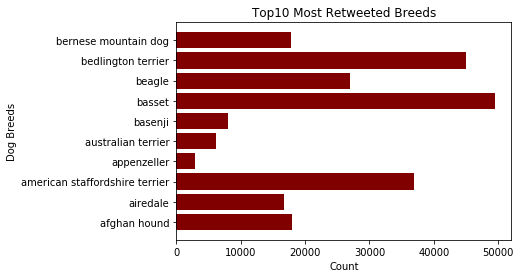

In [118]:
dog_breeds = top10_most_retweeted.index
count = top10_most_retweeted.tolist()

plt.barh(dog_breeds, count, color='maroon');

plt.ylabel("Dog Breeds")
plt.xlabel("Count")
plt.title("Top10 Most Retweeted Breeds")
plt.savefig("Top10_Most_Retweeted_Breeds.png", bbox_inches='tight')

plt.show()